# Lab 1 – Data analysis
### PYU33C01, Computer Simulation I: Computational Methods (Mitchison)

In this lab, we will explore [NASA's exoplanet archive](https://exoplanetarchive.ipac.caltech.edu). Let's load packages and import some data from a file. Since the file contains a mix of data types, we'll first import everything as a string and then convert to the relevant data type later.

In [1]:
# Load packages
import numpy as np
import matplotlib.pyplot as plt
# Increase the font size to 16
plt.rcParams.update({'font.size': 16})

# This reads each line of the data file and stores it as an array of strings
data = np.loadtxt('planets_2024.csv', delimiter=',', dtype=str)

The first row contains the column labels

In [2]:
labels = data[0]
print(labels)

['pl_name' 'hostname' 'disc_year' 'disc_facility' 'pl_orbsmax' 'pl_bmassj'
 'st_mass' 'sy_dist']


Subsequent rows contain data for each planet, e.g. this prints the name and mass of the first planet on the list:

In [3]:
print('Name:', data[1,0], '\nMass:', data[1,5], 'Jupiter masses')

Name: 11 Com b 
Mass: 15.46400 Jupiter masses


We can now use array slicing and typecasting to extract the data:

In [4]:
# Planet names (the first row containing the labels is excluded)
names = data[1:,0]
# Years of discovery (typecast as integers)
years = data[1:,2].astype(int)

Now we can use NumPy tools to explore the data set. For example, let's use argsort() to find the first ten planets that were discovered.

In [5]:
# Indices that sort the years chronologically
inds = years.argsort()
print(inds)

# These two lines of code do the same thing: sort the years in increasing order
sorted_years = years[inds]
sorted_years = np.sort(years)
print(sorted_years[:10])

[4974 4973 4972 ...   18 5009 5107]
[1992 1992 1994 1995 1996 1996 1996 1996 1996 1996]


In [6]:
# Pick out indices corresponding to the first ten database entries (sorted chronologically)
inds = inds[:10]

# Print the name and year of discovery for the first ten exoplanets that were discovered
print('%-20s %-4s' %('Planet', 'Year'))
print('-'*25)
for ii in inds:
    print('%-20s %-4i' %(names[ii], years[ii]))

Planet               Year
-------------------------
PSR B1257+12 d       1992
PSR B1257+12 c       1992
PSR B1257+12 b       1994
51 Peg b             1995
55 Cnc b             1996
16 Cyg B b           1996
ups And b            1996
tau Boo b            1996
70 Vir b             1996
47 UMa b             1996


#### A quick fix.....  
Some of the fields are missing for certain stars, which could cause difficulty.  
More advanced database packages, like pandas, can account for this.   
For now, we'll use a quick fix and replace all the empty fields with '0'.


In [7]:
data[np.nonzero(data=='')] = '0'

## Exercise 1
Find all planets with mass more than 25 times Jupiter's mass (the unit used in the database).   
Print their names, masses, and year of discovery.   
Order the list chronologically.

In [8]:
# Make an array of planet masses
masses = data[1:,5].astype(float)

In [9]:
# Find the indices of planets with masses greater than 25 Jupiters
big_planets = np.nonzero(masses>25.0)
names[big_planets]

array(['2MASS J11011926-7732383 b', 'DENIS-P J082303.1-491201 b',
       'G 196-3 b', 'GJ 680 b', 'HD 105618 c', 'HD 110537 b',
       'HD 125390 b', 'HD 153557 d', 'HD 188641 b', 'HD 206893 b',
       'HD 26161 b', 'HD 284149 AB b', 'HD 457 b', 'HD 6860 b',
       'HR 2562 b', 'K2-52 b', 'KELT-1 b', 'KMT-2018-BLG-0885L b',
       'Kepler-1979 b', 'Kepler-297 d', 'Kepler-471 b', 'Kepler-485 b',
       'Kepler-493 b', 'Kepler-718 b', 'Luhman 16 b', 'PZ Tel b'],
      dtype='<U46')

In [15]:
# Find the indices that sort the years chronologically (you only need to sort the discovery years of the big planets)

big_planets_array = data[big_planets]
big_planet_names = big_planets_array[:,0]
big_planet_years = big_planets_array[:,2].astype(int)
new_inds = big_planet_years.argsort()


In [16]:
# Print the results
print('%-20s %-4s' %('Planet', 'Year'))
print('-'*25)
for ii in new_inds:
    print('%-20s %-4i' %(big_planet_names[ii], big_planet_years[ii]))

Planet               Year
-------------------------
HD 188015 b          2004
HN Peg b             2006
HD 45652 b           2008
FU Tau b             2008
HD 206610 b          2009
HD 28254 b           2010
2MASS J04414489+2301513 b 2010
GJ 676 A e           2012
Kepler-297 c         2014
LkCa 15 c            2015
K2-99 b              2016
Kepler-717 b         2016
Kepler-491 b         2016
Kepler-484 b         2016
HD 68402 b           2016
K2-50 b              2016
PSR J2322-2650 b     2017
DE CVn b             2018
Kepler-47 d          2019
KMT-2018-BLG-0748L b 2020
HD 110113 c          2021
HD 260655 c          2022
HD 105618 b          2022
HD 125271 b          2022
HD 153557 c          2022
Kepler-1978 b        2023


## Exercise 2
How many instances are there of each system size? (The system size is the number of planets orbiting a given host star.)      
Make a plot of system size versus the number of instances. Remember: [always label your axes](https://xkcd.com/833)!    
Save the figure to a pdf file and check that it has saved properly.

11 Com 1
11 UMi 1
14 And 1
14 Her 2
16 Cyg B 1
17 Sco 1
18 Del 1
1RXS J160929.1-210524 1
24 Boo 1
24 Sex 2
2MASS J01033563-5515561 A 1
2MASS J01225093-2439505 1
2MASS J02192210-3925225 1
2MASS J0249-0557 A 1
2MASS J03590986+2009361 1
2MASS J04372171+2651014 1
2MASS J04414489+2301513 1
2MASS J11011926-7732383 1
2MASS J11550485-7919108 1
2MASS J12073346-3932539 1
2MASS J19383260+4603591 3
2MASS J21252752-8138278 1
2MASS J22362452+4751425 1
30 Ari B 1
4 UMa 1
42 Dra 1
47 UMa 3
51 Eri 1
51 Peg 1
55 Cnc 5
6 Lyn 1
61 Vir 3
7 CMa 2
70 Vir 1
75 Cet 2
8 UMi 1
81 Cet 1
91 Aqr 1
AB Aur 1
AB Pic 1
AF Lep 1
AU Mic 3
BD+03 2562 1
BD+14 4559 1
BD+15 2375 1
BD+15 2940 1
BD+20 2457 2
BD+20 274 1
BD+20 594 1
BD+45 564 1
BD+48 738 1
BD+48 740 1
BD+49 828 1
BD+55 362 1
BD+60 1417 1
BD+63 1405 1
BD-06 1339 2
BD-08 2823 2
BD-10 3166 1
BD-11 4672 2
BD-13 2130 1
BD-14 3065 A 1
BD-17 63 1
BD-210397 2
Barnard's star 1
CD Cet 1
CFBDSIR J145829+101343 1
CFHTWIR-Oph 98 A 1
CHXR 73 1
CI Tau 1
COCONUTS-2 A 1
CT Cha 

/tmp/ipykernel_7032/607252510.py:19: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  size_count = len(np.where(system_sizes == i)[0])


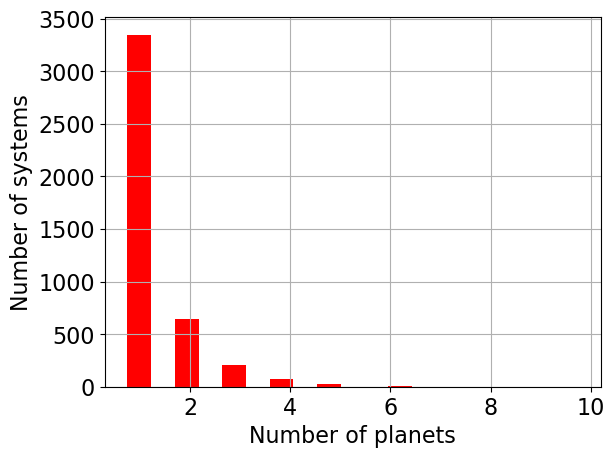

In [27]:
# Generate an array of unique star names 
stars = data[1:,1]
stars = np.unique(stars)

# Go through the database and count how many times each star appears

for i in stars:
    count = len(np.where(data[:,1] == i)[0])
    print(i, count)

# Make a list of the possible system sizes
system_sizes = []
for i in stars:
    count = len(np.where(data[:,1] == i)[0])
    system_sizes.append(count)

# Count how many times each system size occurs
for i in system_sizes:
    size_count = len(np.where(system_sizes == i)[0])

counts, bins = np.histogram(system_sizes, bins=np.arange(1,10))
# Plot the results
fig, ax = plt.subplots()
ax.hist(system_sizes, bins=np.linspace(1,10, 20)-0.25, color='red',)
ax.grid(True)
ax.set_xlabel('Number of planets')
ax.set_ylabel('Number of systems')


# Save the plot
plt.savefig('system_size.pdf', bbox_inches = 'tight')

## Exercise 3
What is the mass distribution among super-Jupiters that have been found?    
Focus on planets with more than Jupiter's mass. 
Plot (i.e. [histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)) the distribution of planet masses and save the resulting figure.  
Calculate and print the mean, median, and standard deviation of the distribution. Remember: always state the units!

(array([1570, 1706, 1862, 1863, 1864, 1974, 3317, 3662, 4038, 4062, 4070,
       4149, 4324, 4344, 4385, 4392, 4394, 4435, 4467, 4778, 4779, 4816,
       5121]),)
Mean: 6.779600327868852 Median: 3.2445 Standard deviation: 14.911923716142168


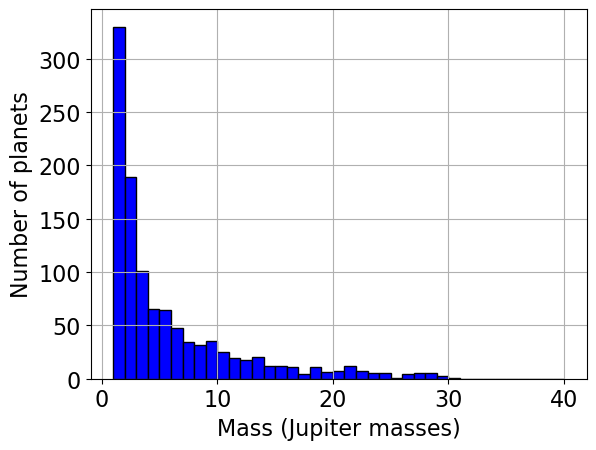

In [41]:
# Make a list of non-zero masses
masses = data[1:,5][np.nonzero(data[1:,5])].astype(float)

question = np.where(masses == 0)
print(question)

# Restrict the list to planets with more than Jupiter's mass
supe_jupe_masses = masses[np.nonzero(masses > 1.0)]

# Compute mean, median etc.
sup_jups_mean, sup_jups_median, sup_jups_std_dev = supe_jupe_masses.mean(), np.median(supe_jupe_masses), supe_jupe_masses.std()

# Make a histogram
fig, ax = plt.subplots()
ax.hist(supe_jupe_masses, bins=np.linspace(1,40, 40), color='blue', edgecolor='black')
ax.grid(True)
ax.set_xlabel('Mass (Jupiter masses)')
ax.set_ylabel('Number of planets')


# Save the histogram
plt.savefig('SupeJupes.pdf')

# Print the mean, median and standard deviation
print('Mean:', sup_jups_mean, 'Median:', sup_jups_median, 'Standard deviation:', sup_jups_std_dev)



## Exercise 4
How has the detection sensitivity in terms of planet mass changed over time?    
For each year, find the maximum and minimum mass of the planets discovered.     
Plot these maximum and minimum masses as two curves against time, including a [legend](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html). Use a logarithmic scale for mass.

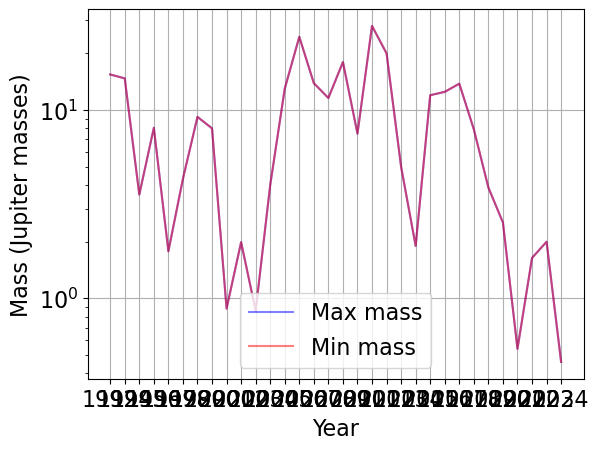

In [44]:
sens_years = data[1:,2]
sens_years = np.unique(sens_years)

max_masses = []
min_masses = []
for i in sens_years:
    inds = np.where(sens_years == i)
    max_mass = np.max(np.array([masses[j] for j in inds]).astype(float))
    min_mass = np.min(np.array([masses[j] for j in inds]).astype(float))
    max_masses.append(max_mass)
    min_masses.append(min_mass)

fig, ax = plt.subplots()
fig.set_
ax.plot(sens_years, max_masses, color='blue', alpha=0.5, label='Max mass')
ax.plot(sens_years, min_masses, color='red', alpha=0.5, label='Min mass')
ax.grid(True)
ax.set_xlabel('Year')
ax.set_ylabel('Mass (Jupiter masses)')
ax.set_yscale('log')
ax.legend()

plt.savefig('masses.pdf')
